# **Proyecto IA - SISTEMA DE PREDICCIÓN DE VENTAS**

# **Montar drive**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto IA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Proyecto IA


# **Importar librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Proyecto IA/Train.csv")

# Mostrar las primeras filas
df.head()


,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


# **Procesamiento de datos**

In [ ]:
# Se mira si las columnas tienen valores nulos
print(df.isnull().sum())
df.info()


Date                      0
Category                  0
Brand                     0
Day_of_Week               0
Holiday_Indicator         0
Past_Purchase_Trends      0
Price                     0
Discount                  0
Competitor_Price          0
Sales_Quantity          464
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-

In [ ]:
# Eliminar filas con valores nulos en Sales_Quantity
df_clean = df.dropna()

# Eliminar registros duplicados
df_clean = df_clean.drop_duplicates()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18019 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18019 non-null  object 
 1   Category              18019 non-null  object 
 2   Brand                 18019 non-null  object 
 3   Day_of_Week           18019 non-null  int64  
 4   Holiday_Indicator     18019 non-null  int64  
 5   Past_Purchase_Trends  18019 non-null  float64
 6   Price                 18019 non-null  float64
 7   Discount              18019 non-null  float64
 8   Competitor_Price      18019 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
# Asegúrate de que 'Date' esté en formato datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d/%m/%y')

# Gráficas

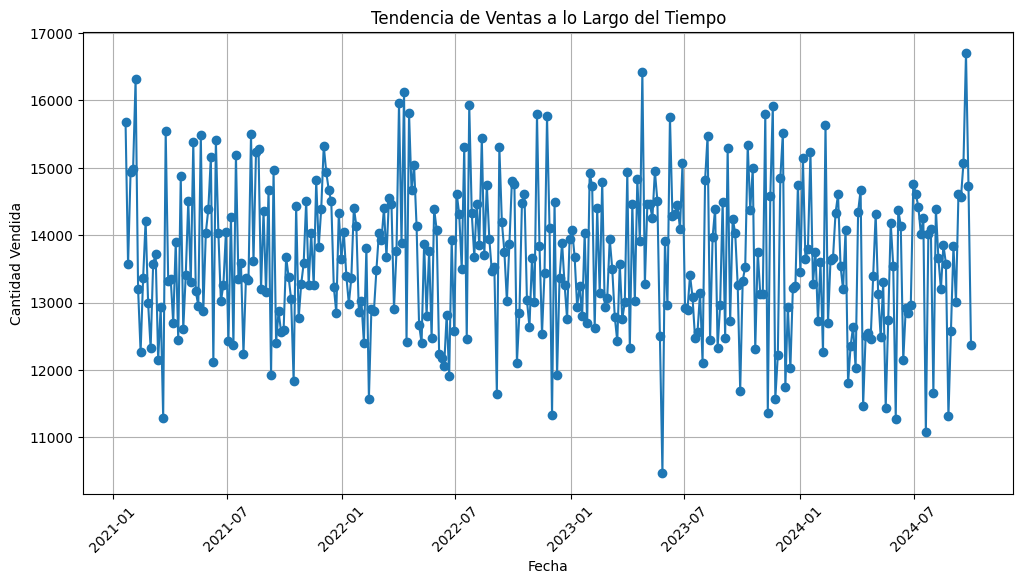

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Agrupar por fecha y sumar las ventas
ventas_por_dia = df_clean.groupby('Date')['Sales_Quantity'].sum().reset_index()

# Graficar la tendencia de ventas
plt.figure(figsize=(12,6))
plt.plot(ventas_por_dia['Date'], ventas_por_dia['Sales_Quantity'], marker='o')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


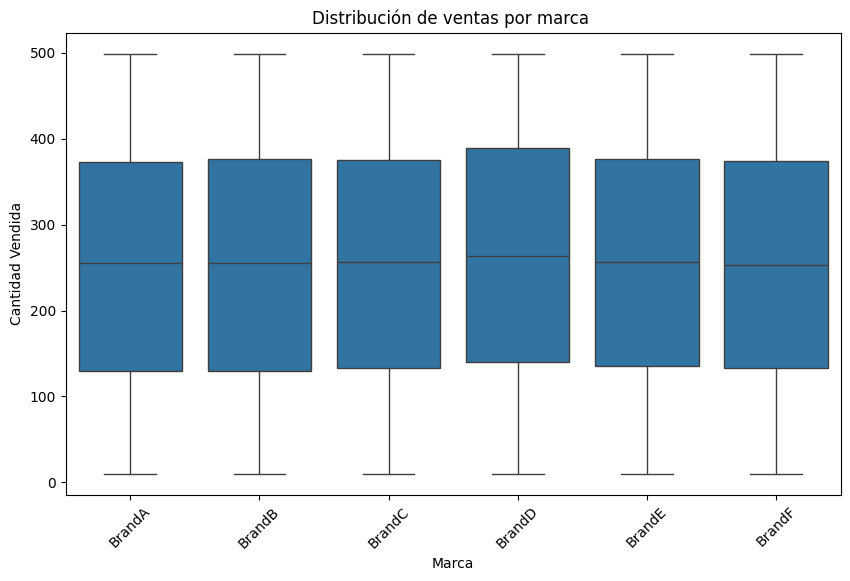

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='Brand', y='Sales_Quantity')
plt.title("Distribución de ventas por marca ")
plt.xlabel("Marca")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()

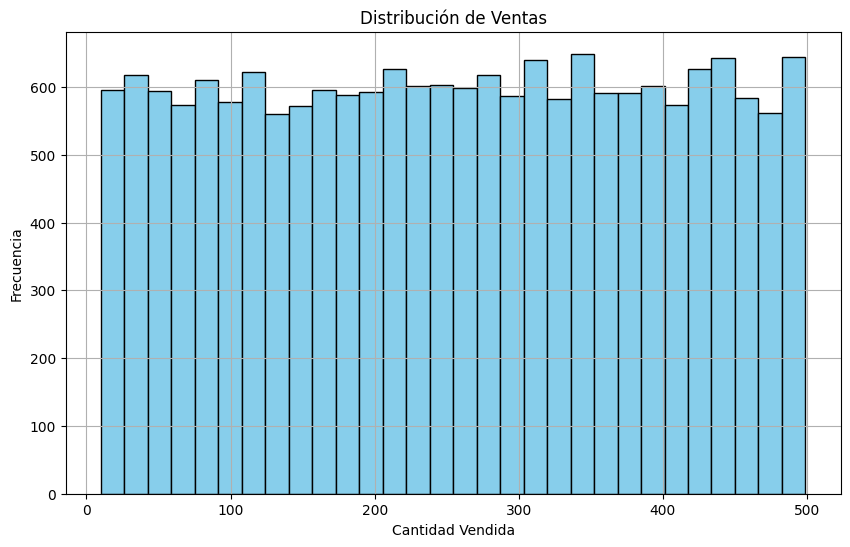

In [ ]:
# Histograma de ventas
plt.figure(figsize=(10,6))
plt.hist(df_clean['Sales_Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



<ipython-input-11-1f1e37b74621>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_dia_semana, x='Day_of_Week', y='Sales_Quantity', palette='viridis')


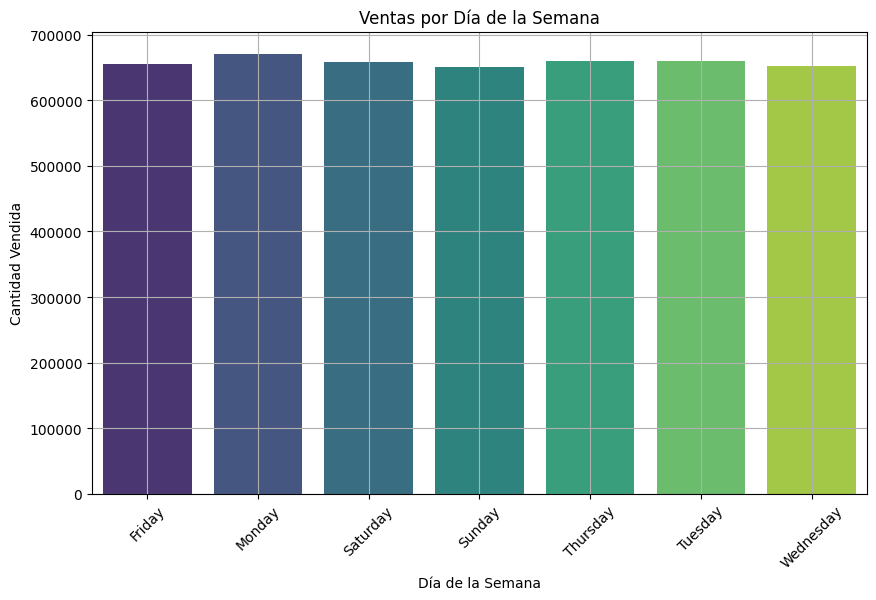

In [ ]:
# Asegúrate de que 'Day_of_Week' esté presente
# Si no tienes una columna 'Day_of_Week', extrae el día de la semana de la columna 'Date'
df_clean['Day_of_Week'] = df_clean['Date'].dt.day_name()

# Agrupar por día de la semana y sumar las ventas
ventas_por_dia_semana = df_clean.groupby('Day_of_Week')['Sales_Quantity'].sum().reset_index()

# Graficar las ventas por día de la semana
plt.figure(figsize=(10,6))
sns.barplot(data=ventas_por_dia_semana, x='Day_of_Week', y='Sales_Quantity', palette='viridis')
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Procesamiento**

In [ ]:
# Observar estadisticas de las columnas tipo objeto
df_clean.describe(include="object")

,Category,Brand
count,18019,18019
unique,8,6
top,Beauty,BrandF
freq,2329,3082


In [ ]:
# Observar las categorias existentes y cuantas filas pertenecen a esta categoria
df_clean["Category"].value_counts()

,count
Category,
Beauty,2329
Clothing,2297
Toys,2259
Automotive,2255
Sports,2255
Books,2240
Home,2199
Electronics,2185


In [ ]:
# Observar las marcas existentes y cuantas filas pertenecen a esta categoria
df_clean["Brand"].value_counts()

,count
Brand,
BrandF,3082
BrandA,3072
BrandE,3072
BrandB,2937
BrandD,2937
BrandC,2919


In [ ]:
# Se divide la variable brand en varias columnas para darle un valor numérico
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["Brand"]).astype(int)], axis=1)
df_clean.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,BrandA,BrandB,BrandC,BrandD,BrandE,BrandF
0,2024-09-26,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0,1,0,0,0,0,0
1,2024-09-26,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0,1,0,0,0,0,0
2,2024-09-26,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0,1,0,0,0,0,0
3,2024-09-26,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0,1,0,0,0,0,0
4,2024-09-22,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0,1,0,0,0,0,0


In [ ]:
# Se elimina la columna brand ya que ya no es necesaria
df_clean = df_clean.drop("Brand", axis=1)
df_clean.head()

,Date,Category,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,BrandA,BrandB,BrandC,BrandD,BrandE,BrandF
0,2024-09-26,Automotive,3,0,17.9,462.30,33.96,359.45,227.0,1,0,0,0,0,0
1,2024-09-26,Automotive,3,0,66.3,321.28,24.76,49.47,370.0,1,0,0,0,0,0
2,2024-09-26,Automotive,3,0,14.4,74.85,32.19,245.11,299.0,1,0,0,0,0,0
3,2024-09-26,Automotive,3,0,34.7,469.12,43.68,144.08,426.0,1,0,0,0,0,0
4,2024-09-22,Automotive,6,1,93.5,221.76,36.79,478.07,470.0,1,0,0,0,0,0


In [ ]:
# Se realiza el mismo proceso con la variable category
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["Category"]).astype(int)], axis=1)
df_clean.head()
# importar el decission tree
from sklearn.tree import DecisionTreeClassifier

# importar

In [ ]:
# Se elimina la columna category
df_clean = df_clean.drop("Category", axis=1)
df_clean.head()

,Date,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,BrandA,BrandB,...,BrandE,BrandF,Automotive,Beauty,Books,Clothing,Electronics,Home,Sports,Toys
0,2024-09-26,3,0,17.9,462.30,33.96,359.45,227.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2024-09-26,3,0,66.3,321.28,24.76,49.47,370.0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2024-09-26,3,0,14.4,74.85,32.19,245.11,299.0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2024-09-26,3,0,34.7,469.12,43.68,144.08,426.0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2024-09-22,6,1,93.5,221.76,36.79,478.07,470.0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Se realiza el mismo proceso con la variable day_of_week
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["Day_of_Week"]).astype(int)], axis=1)
df_clean.head()

,Date,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,BrandA,BrandB,...,Home,Sports,Toys,0,1,2,3,4,5,6
0,2024-09-26,3,0,17.9,462.30,33.96,359.45,227.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2024-09-26,3,0,66.3,321.28,24.76,49.47,370.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2024-09-26,3,0,14.4,74.85,32.19,245.11,299.0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2024-09-26,3,0,34.7,469.12,43.68,144.08,426.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2024-09-22,6,1,93.5,221.76,36.79,478.07,470.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Se elimina la columna day_of_week
df_clean = df_clean.drop("Day_of_Week", axis=1)
df_clean.head()

,Date,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,BrandA,BrandB,BrandC,...,Home,Sports,Toys,0,1,2,3,4,5,6
0,2024-09-26,0,17.9,462.30,33.96,359.45,227.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2024-09-26,0,66.3,321.28,24.76,49.47,370.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2024-09-26,0,14.4,74.85,32.19,245.11,299.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2024-09-26,0,34.7,469.12,43.68,144.08,426.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2024-09-22,1,93.5,221.76,36.79,478.07,470.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_clean.columns

Index([                'Date',    'Holiday_Indicator', 'Past_Purchase_Trends',
                      'Price',             'Discount',     'Competitor_Price',
             'Sales_Quantity',               'BrandA',               'BrandB',
                     'BrandC',               'BrandD',               'BrandE',
                     'BrandF',           'Automotive',               'Beauty',
                      'Books',             'Clothing',          'Electronics',
                       'Home',               'Sports',                 'Toys',
                            0,                      1,                      2,
                            3,                      4,                      5,
                            6],
      dtype='object')

In [ ]:
print("Estadísticas generales del dataset:")
print(df_clean.describe())

Estadísticas generales del dataset:
                                Date  Holiday_Indicator  Past_Purchase_Trends  \
count                          18019       18019.000000          18019.000000   
mean   2022-11-23 10:05:02.480715008           0.141517             52.303435   
min              2021-01-21 00:00:00           0.000000              5.000000   
25%              2021-12-23 00:00:00           0.000000             28.900000   
50%              2022-11-24 00:00:00           0.000000             52.500000   
75%              2023-10-26 00:00:00           0.000000             75.700000   
max              2024-09-30 00:00:00           1.000000            100.000000   
std                              NaN           0.348564             27.396432   

              Price      Discount  Competitor_Price  Sales_Quantity  \
count  18019.000000  18019.000000       18019.00000    18019.000000   
mean     275.009211     27.496220         259.80446      255.665631   
min       50.070000  

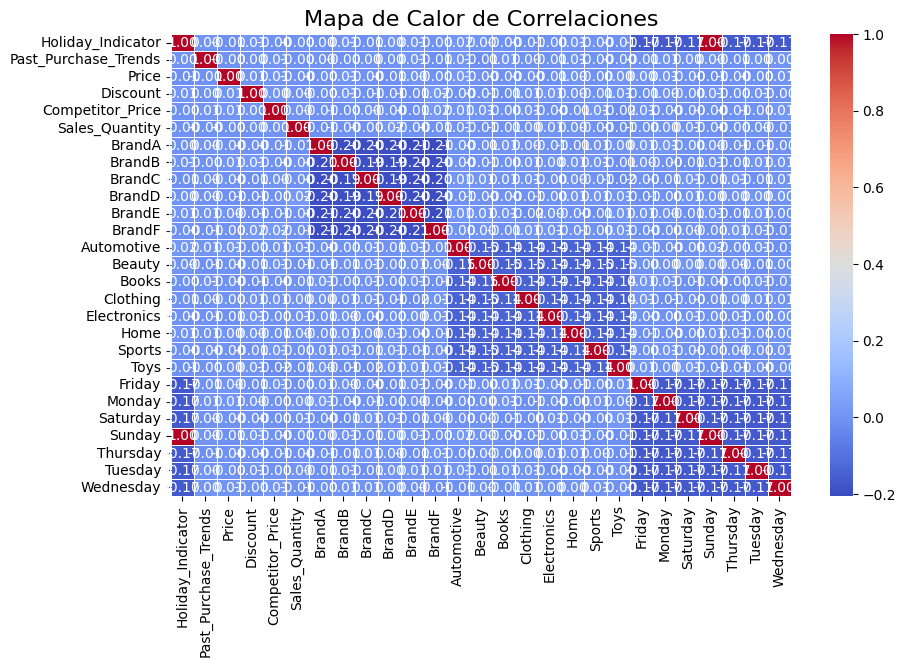

In [ ]:
df_numeric = df_clean.select_dtypes(include=["number"])
corr = df_numeric.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

# Como las variables casi no tienen cocrrelación con otras, vamos a usar todas las caracteristicas para los modelos

# **MODELOS SUPERVISADOS**

#**Decision Tree**

In [ ]:
#Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X = df_clean.drop(columns=["Sales_Quantity","Date"])
Y = df_clean["Sales_Quantity"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




In [ ]:
X_train.shape

(14415, 20)

In [ ]:
Y_train.shape

(14415,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, Y_train)

# Predecir sobre el conjunto de prueba
pred_tree = reg_tree.predict(X_test)

# Calcular métricas
mse_tree = mean_squared_error(Y_test, pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(Y_test, pred_tree)

# Mostrar métricas
print("Métricas del modelo Decision Tree:")
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)
print("MAE:", mae_tree)

Métricas del modelo Decision Tree:
MSE: 39765.97003329634
RMSE: 199.41406678892125
MAE: 163.6276359600444


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
import numpy as np


random_regressor = RandomForestRegressor(n_estimators=150, random_state=42)
random_regressor.fit(X_train, Y_train)
predictions = random_regressor.predict(X_test)
mse_rf = mean_squared_error(Y_test, predictions)
rmse_rf = root_mean_squared_error(Y_test, predictions)
mae_rf = mean_absolute_error(Y_test, predictions)

print("MSE:", mse_rf)
print("RMSE:",rmse_rf)
print("MAE:", mae_rf)

MSE: 20642.77330149217
RMSE: 143.67593153166666
MAE: 123.6629670736219


#Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# Entrenar modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

predictions = linear_model.predict(X_test)

# Calcular métricas
mse_r = mean_squared_error(Y_test, predictions)
rmse_r = root_mean_squared_error(Y_test, predictions)
mae_r = mean_absolute_error(Y_test, predictions)

print("MSE:", mse_r)
print("RMSE:", rmse_r)
print("MAE:", mae_r)


MSE: 19975.703416365846
RMSE: 141.3354287373334
MAE: 122.08153370121897


In [ ]:
import pandas as pd

# Diccionario con los resultados
resultados = {
    "Modelo": ["Decision Tree", "Random Forest", "Regresión Lineal"],
    "MSE":  [mse_tree,  mse_rf,  mse_r],
    "RMSE": [rmse_tree, rmse_rf, rmse_r],
    "MAE":  [mae_tree,  mae_rf,  mae_r]
}

# Crear DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Mostrar en pantalla
print("\nTabla comparativa de métricas")
print(tabla_resultados.to_string(index=False, float_format="%.4f"))



Tabla comparativa de métricas
          Modelo        MSE     RMSE      MAE
   Decision Tree 39765.9700 199.4141 163.6276
   Random Forest 20642.7733 143.6759 123.6630
Regresión Lineal 19975.7034 141.3354 122.0815


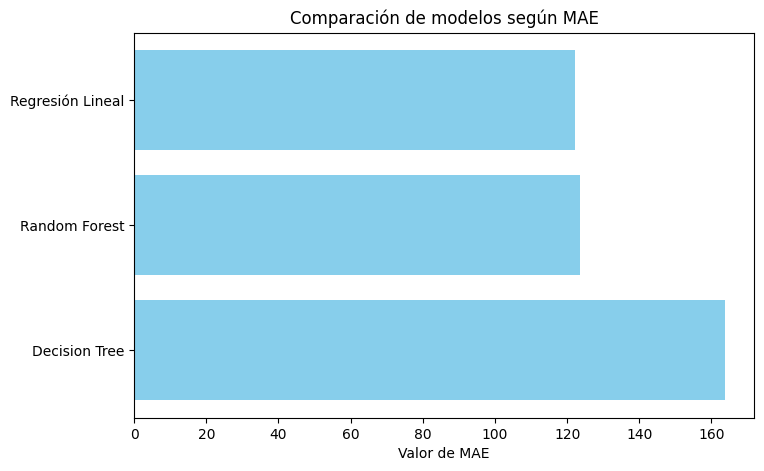

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics1 = {
    "Decision Tree": {
        "mse": mse_tree,
        "rmse": rmse_tree,
        "mae": mae_tree
    },
    "Random Forest": {
        "mse": mse_rf,
        "rmse": rmse_rf,
        "mae": mae_rf
    },
    "Regresión Lineal": {
        "mse": mse_r,
        "rmse": rmse_r,
        "mae": mae_r
    }
}

metric_key = 'mae'
# Extraemos los valores para cada modelo
models = list(metrics1.keys())
values = [metrics1[m][metric_key] for m in models]

# Ordenamos modelos y valores según la métrica (de menor a mayor)
sorted_indices = np.argsort(values)
sorted_models = [models[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

plt.figure(figsize=(8,5))
plt.barh(sorted_models, sorted_values, color='skyblue')
plt.xlabel(f'Valor de {metric_key.upper()}')
plt.title(f'Comparación de modelos según {metric_key.upper()}')
plt.gca().invert_yaxis()  # Para mostrar el mejor modelo arriba
plt.show()


# **NO SUPERVISADO**

#**K-MEANS**

In [ ]:
df_clean = df_clean.reset_index(drop=True)

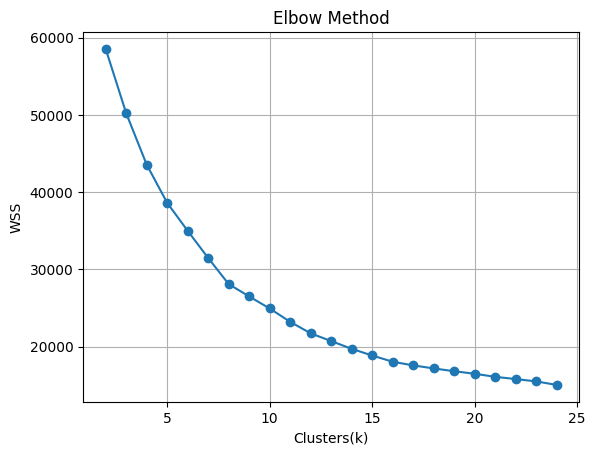

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Seleccionar las columnas relevantes para el clustering
features_for_clustering = ['Price', 'Discount', 'Competitor_Price', 'Past_Purchase_Trends']
X = df_clean[features_for_clustering].copy()

# -- Escalar los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Método del Elbow ---
wss = []
for i in range(2, 25):
    kmeans_elbow = KMeans(n_clusters=i, init="k-means++",max_iter=300, random_state=0, n_init=10) #
    kmeans_elbow.fit(X_scaled)
    wss.append(kmeans_elbow.inertia_)


plt.plot(range(2, 25), wss, marker='o')
plt.title(f"Elbow Method")
plt.xlabel("Clusters(k)")
plt.ylabel("WSS")
plt.grid(True)
plt.show()



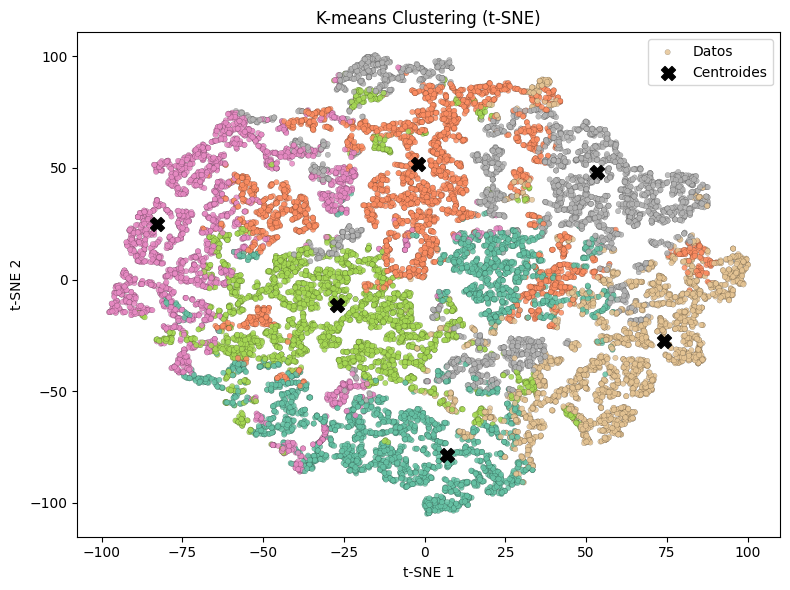

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# K-means clustering
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# t-SNE
X_combined = np.vstack([X_scaled, centroids])  # juntar datos + centroides

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne_combined = tsne.fit_transform(X_combined)

# Separar datos y centroides en el espacio t-SNE

X_tsne = X_tsne_combined[:X_scaled.shape[0], :]       # los datos originales transformados por t-SNE
centroids_tsne = X_tsne_combined[X_scaled.shape[0]:, :]  # los centroides transformados por t-SNE

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=cluster_labels, cmap='Set2', s=15,
            alpha=0.85, edgecolor='k', linewidth=0.1, label='Datos')
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1],
            c='black', marker='X', s=100, label='Centroides')
plt.title('K-means Clustering (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.tight_layout()
plt.show()

# DBScan

Con eps=0.32 y min_samples=10:
Número de clusters encontrados por DBSCAN: 282
Número de puntos considerados ruido (etiqueta -1): 7999

Distribución de puntos por cluster:
DBSCAN_Cluster
-1      7999
 0        10
 1       134
 2      2952
 3        10
        ... 
 277      10
 278       8
 279       6
 280       6
 281      10
Name: count, Length: 283, dtype: int64


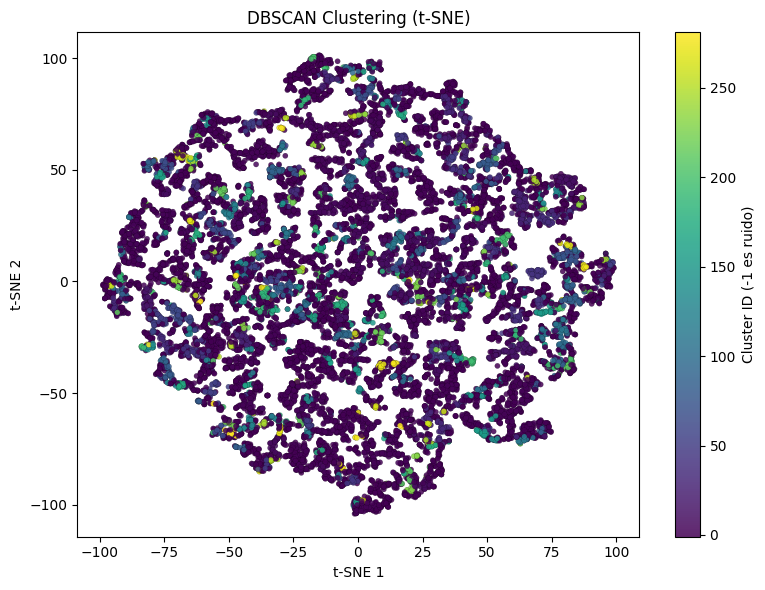

In [ ]:
# NO SUPERVISADO - DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


features_for_clustering = ['Price', 'Discount', 'Competitor_Price', 'Past_Purchase_Trends']

X = df_clean[features_for_clustering].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


eps_value = 0.32
min_samples_value = 10

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

df_clean['DBSCAN_Cluster'] = cluster_labels_dbscan

# --- Analizar los resultados ---

n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise_dbscan = list(cluster_labels_dbscan).count(-1)

print(f"Con eps={eps_value} y min_samples={min_samples_value}:")
print(f"Número de clusters encontrados por DBSCAN: {n_clusters_dbscan}")
print(f"Número de puntos considerados ruido (etiqueta -1): {n_noise_dbscan}")
print("\nDistribución de puntos por cluster:")
print(df_clean['DBSCAN_Cluster'].value_counts().sort_index())

# --- Visualización ---

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Graficar los resultados del clustering de DBSCAN
plt.figure(figsize=(8, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=cluster_labels_dbscan, cmap='viridis', s=15,
            alpha=0.85, edgecolor='k', linewidth=0.1)

plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster ID (-1 es ruido)')
plt.tight_layout()
plt.show()